## Pre processamento da serie temporal 01 - cotacao do dolar
### Transformacao da serie para estacionaria

In [48]:
import pandas as pd
import numpy as np
import warnings

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

# imports de modulos que estao definidos dentro do projeto
import data
import timeseries
import arima

import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
df_daily = data.load_timeseries01_daily()
#timeseries.plot_timeserie(df_daily)

In [50]:
df_monthly = data.load_timeseries01_monthly()
#timeseries.plot_timeserie(df_monthly)

### Transformacao da serie temporal DIARIA

In [51]:
log_df_daily = np.log(df_daily)
#timeseries.plot_timeserie(log_df_daily)

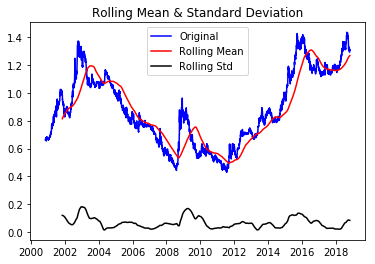

Results of Dickey-Fuller Test:
Test Statistic (-1.128302) > Critical Value 1 (-3.431348)
Test Statistic (-1.128302) > Critical Value 5 (-2.861981)
Test Statistic (-1.128302) > Critical Value 10 (-2.567005)
p-value (0.703655) > 0.05


In [52]:
timeseries.check_stationarity(log_df_daily, window=365)

In [53]:
log_df_daily_diff = log_df_daily - log_df_daily.shift()
log_df_daily_diff.dropna(inplace=True)
#timeseries.plot_timeserie(log_df_daily_diff)

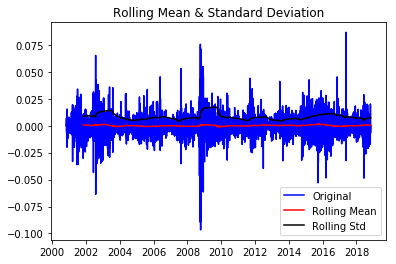

Results of Dickey-Fuller Test:
Test Statistic (-15.399245) < Critical Value 1 (-3.431348)
Test Statistic (-15.399245) < Critical Value 5 (-2.861981)
Test Statistic (-15.399245) < Critical Value 10 (-2.567005)
p-value (0.000000) < 0.05


In [54]:
timeseries.check_stationarity(log_df_daily_diff, window=365)

### Transformacao da serie temporal MENSAL

In [55]:
log_df_monthly = np.log(df_monthly)
#timeseries.plot_timeserie(log_df_monthly)

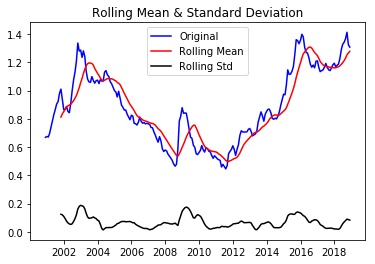

Results of Dickey-Fuller Test:
Test Statistic (-1.431590) > Critical Value 1 (-3.461136)
Test Statistic (-1.431590) > Critical Value 5 (-2.875079)
Test Statistic (-1.431590) > Critical Value 10 (-2.573986)
p-value (0.567042) > 0.05


In [56]:
timeseries.check_stationarity(log_df_monthly, window=12)

In [57]:
log_df_monthly_diff = log_df_monthly - log_df_monthly.shift()
log_df_monthly_diff.dropna(inplace=True)
#timeseries.plot_timeserie(log_df_monthly_diff)

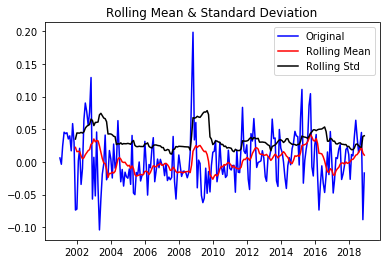

Results of Dickey-Fuller Test:
Test Statistic (-9.652797) < Critical Value 1 (-3.461136)
Test Statistic (-9.652797) < Critical Value 5 (-2.875079)
Test Statistic (-9.652797) < Critical Value 10 (-2.573986)
p-value (0.000000) < 0.05


In [58]:
timeseries.check_stationarity(log_df_monthly_diff, window=12)

### ARIMA aplicado na serie temporal DIARIA

In [59]:
# teste com 150 combinacoes de parametros
# melhores parametros encontrados no Grid Search
arima_params = (0, 1, 1)

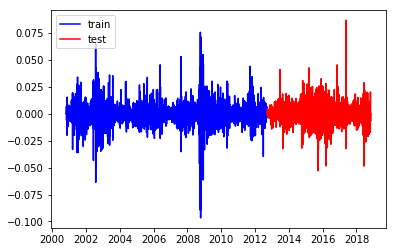

In [60]:
X = log_df_daily_diff
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

plt.plot(train, label='train', color='blue')
plt.plot(test, label='test', color='red')
plt.legend(loc='upper left')

Text(0.5,1,'MSE: 0.669774690')

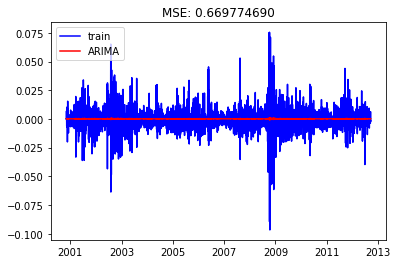

In [61]:
# modelo ARIMA aplicado aos dados de treinamento
model = ARIMA(log_df_daily, order=arima_params)
results_ARIMA = model.fit(disp=False)

plt.plot(train, label='train', color='blue')
plt.plot(results_ARIMA.fittedvalues[0:size], label='ARIMA', color='red')
plt.legend(loc='upper left')
plt.title('MSE: %.9f'% mean_squared_error(log_df_daily[0:size].values, results_ARIMA.fittedvalues[0:size].values))

In [62]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

predictions_ARIMA_log = pd.Series(log_df_daily.iloc[0], index=log_df_daily.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

predictions_ARIMA = np.exp(predictions_ARIMA_log)
#predictions_ARIMA = predictions_ARIMA.apply(lambda x: x*1.5) # # #

rates = []
for row_index, row in df_daily.iterrows():
    rates.append(row[0])

t = pd.Series(data=rates, index=df_daily.index, copy=True)

Text(0.5,1,'MSE: 1.863387717')

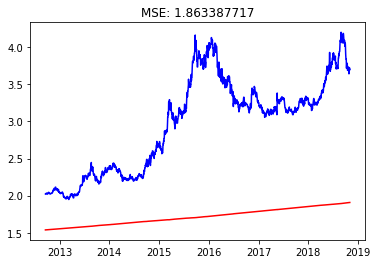

In [63]:
# previsao em cima dos dados de teste
teste = t[size:len(X)]
previsao = predictions_ARIMA[size:len(X)]

plt.plot(teste.index.to_pydatetime(), teste.values, label='test', color='blue')
plt.plot(teste.index.to_pydatetime(), previsao.values, label='ARIMA', color='red')
plt.title('MSE: %.9f'% mean_squared_error(teste.values, previsao.values))

### ARIMA aplicado na serie temporal MENSAL

In [64]:
# teste com 150 combinacoes de parametros
# melhores parametros encontrados no Grid Search
# Melhores parametros: ARIMA(0, 1, 1) MSE=0.001153267
arima_params = (0, 1, 1)

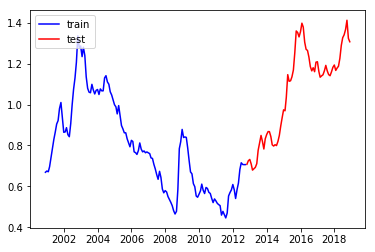

In [65]:
#X = log_df_monthly_diff
X = log_df_monthly
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

plt.plot(train, label='train', color='blue')
plt.plot(test, label='test', color='red')
plt.legend(loc='upper left')

Text(0.5,1,'MSE: 0.669892209')

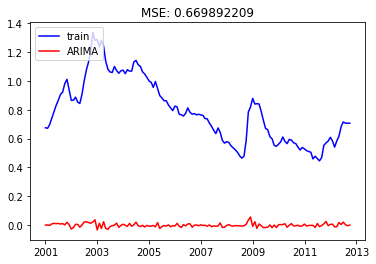

In [66]:
# modelo ARIMA aplicado aos dados de treinamento
#model = ARIMA(log_df_monthly, order=arima_params)
model = ARIMA(train, order=arima_params)
results_ARIMA = model.fit(disp=False)

plt.plot(train[1:], label='train', color='blue')
plt.plot(results_ARIMA.fittedvalues, label='ARIMA', color='red')
plt.legend(loc='upper left')
plt.title('MSE: %.9f'% mean_squared_error(train[1:].values, results_ARIMA.fittedvalues.values))

In [73]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

#predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

#predictions_ARIMA_log = pd.Series(log_df_monthly.iloc[0], index=log_df_monthly.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

#predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA = np.exp(predictions_ARIMA_diff)
#predictions_ARIMA = predictions_ARIMA.apply(lambda x: x*1.6) # # #

rates = []
for row_index, row in df_monthly.iterrows():
    rates.append(row[0])

t = pd.Series(data=rates, index=df_monthly.index, copy=True)

ValueError: x and y must have same first dimension, but have shapes (74,) and (0,)

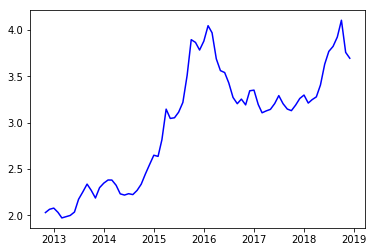

In [74]:
# previsao em cima dos dados de teste
teste = t[size:len(X)]
previsao = predictions_ARIMA[size:len(X)]

plt.plot(teste.index.to_pydatetime(), teste.values, label='test', color='blue')
plt.plot(teste.index.to_pydatetime(), previsao.values, label='ARIMA', color='red')
#plt.title('MSE: %.9f'% mean_squared_error(teste.values, previsao.values))